# Brief Project IMDB

## Scrapping

In [ ]:
pip install requests

In [ ]:
# pour ne pas se faire bannir car trop de requests envoyés
pip install requests-cache

In [ ]:
import requests
import requests_cache
from bs4 import BeautifulSoup
from requests_cache import CachedSession
import os
session = CachedSession()
response = session.get('https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&ref_=adv_prv')
import pandas as pd

In [ ]:
url = 'https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&ref_=adv_prv'
response = requests.get(url)
if response.ok:
    soup = BeautifulSoup(response.text)
    movies = soup.find_all('div', class_ = 'lister-item mode-advanced')

In [ ]:
print(movies)

In [ ]:
print (len(movies)) ## donne la longueur des données de la page

In [ ]:
first_movie = movies[0]

print (first_movie)

In [ ]:
print (first_movie.div)

### Nom

In [ ]:
print (first_movie.a)

In [ ]:
print (first_movie.h3)

In [ ]:
print (first_movie.h3.a)

In [ ]:
first_name = first_movie.h3.a.text
print (first_name)

### Année

In [ ]:
first_year = first_movie.h3.find('span', class_ = 'lister-item-year text-muted unbold').text
print (first_year)

### Genre

In [ ]:
first_genre = first_movie.p.find('span', class_ = 'genre').text
print (first_genre)

### Certificate

In [ ]:
first_certificate = first_movie.p.find('span', class_ = 'certificate').text
print (first_certificate)

### IMDB Ratings

In [ ]:
first_imdb = float(first_movie.strong.text)
print(first_imdb)

### Votes

In [ ]:
first_votes = int(first_movie.find('span', attrs = {'name':'nv'}))
print (first_votes)

In [ ]:
print (first_votes['data-value'])

## Modeles

In [ ]:
names = []
years = []
genres = []
#certificates = []
imdb_ratings = []
votes = []


    
pages = [1, 51, 101, 151, 201]

for page in pages:
    url = f'https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start={page}&ref_=adv_nxt'
    response = requests.get(url)
    
    if response.ok:
        soup = BeautifulSoup(response.text)
        movies = soup.find_all('div', class_ = 'lister-item mode-advanced')

        for movie in movies:
        #The name
            name = movie.h3.a.text
            names.append(name)
        #The year
            year = movie.h3.find('span', class_ = 'lister-item-year').text
            years.append(year)
        #The genre
            genre = movie.p.find('span', class_ = 'genre').text
            genres.append(genre)
        #The certificate
            #certificate = movie.p.find('span', class_ = 'certificate').text
            #certificates.append(certificate)
        # The IMDB rating
            imdb = float(movie.strong.text)
            imdb_ratings.append(imdb)
        # The number of votes
            vote = movie.find('span', attrs = {'name':'nv'})['data-value']
            votes.append(int(vote))


In [ ]:
movie_df = pd.DataFrame({'movie': names,
'year': years,
'genre': genres,
#'certificate': certificates,                         
'imdb': imdb_ratings,
'vote': votes
})

print(movie_df.info())
movie_df

## Dataframe

In [8]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df = pd.read_csv('BP2 - scrapping_imdb.csv')
df

,Unnamed: 0,Ranking,Title,Genre,Year,Runtime_min,Rating,Directors,Stars,Votes,Gross
0,0,1,Les Évadés,Drama,1994,142.0,9.3,Frank Darabont,"['Tim Robbins', ' Morgan Freeman', ' Bob Gunto...",2384498.0,28341469.0
1,1,2,Le parrain,"['Crime', ' Drama']",1972,175.0,9.2,['Francis Ford Coppola'],"['Marlon Brando', ' Al Pacino', ' James Caan',...",1652566.0,134966411.0
2,2,3,The Dark Knight : Le Chevalier noir,"['Action', ' Crime', ' Drama']",2008,152.0,9.0,['Christopher Nolan'],"['Christian Bale', ' Heath Ledger', ' Aaron Ec...",2347962.0,534858444.0
3,3,4,"Le parrain, 2ème partie","['Crime', ' Drama']",1974,202.0,9.0,['Francis Ford Coppola'],"['Al Pacino', ' Robert De Niro', ' Robert Duva...",1149888.0,57300000.0
4,4,5,12 Hommes en colère,"['Crime', ' Drama']",1957,96.0,9.0,['Sidney Lumet'],"['Henry Fonda', ' Lee J. Cobb', ' Martin Balsa...",704057.0,4360000.0
...,...,...,...,...,...,...,...,...,...,...,...
245,245,246,Mr. Smith au sénat,"['Comedy', ' Drama']",1939,129.0,8.1,['Frank Capra'],"['James Stewart', ' Jean Arthur', ' Claude Rai...",108451.0,9600000.0
246,246,247,Autant en emporte le vent,"['Drama', ' History', ' Romance']",1939,238.0,8.1,"['Victor Fleming', 'George Cukor', 'Sam Wood']","['Clark Gable', ' Vivien Leigh', ' Thomas Mitc...",293981.0,198676459.0
247,247,248,New York - Miami,"['Comedy', ' Romance']",1934,105.0,8.1,['Frank Capra'],"['Clark Gable', ' Claudette Colbert', ' Walter...",95754.0,4360000.0
248,248,249,La passion de Jeanne d'Arc,"['Biography', ' Drama', ' History']",1928,110.0,8.1,['Carl Theodor Dreyer'],"['Maria Falconetti', ' Eugene Silvain', ' Andr...",48981.0,21877.0


In [6]:
df.describe()

,Unnamed: 0,Ranking,Year,Runtime_min,Rating,Votes,Gross
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02,2.450000e+02
mean,124.500000,125.500000,1987.292000,129.632000,8.301200,5.481919e+05,8.886691e+07
std,72.312977,72.312977,24.824499,32.476135,0.222343,4.750147e+05,1.324280e+08
min,0.000000,1.000000,1921.000000,45.000000,8.100000,2.803800e+04,1.017700e+04
25%,62.250000,63.250000,1968.750000,107.250000,8.100000,1.608608e+05,5.450000e+06
50%,124.500000,125.500000,1995.000000,126.000000,8.200000,3.984845e+05,3.322550e+07
75%,186.750000,187.750000,2007.000000,145.750000,8.400000,8.464938e+05,1.307429e+08
max,249.000000,250.000000,2020.000000,321.000000,9.300000,2.384498e+06,8.583730e+08


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   250 non-null    int64  
 1   Ranking      250 non-null    int64  
 2   Title        250 non-null    object 
 3   Genre        250 non-null    object 
 4   Year         250 non-null    int64  
 5   Runtime_min  250 non-null    float64
 6   Rating       250 non-null    float64
 7   Directors    250 non-null    object 
 8   Stars        250 non-null    object 
 9   Votes        250 non-null    float64
 10  Gross        245 non-null    float64
dtypes: float64(4), int64(3), object(4)
memory usage: 21.6+ KB


## Vizualisation

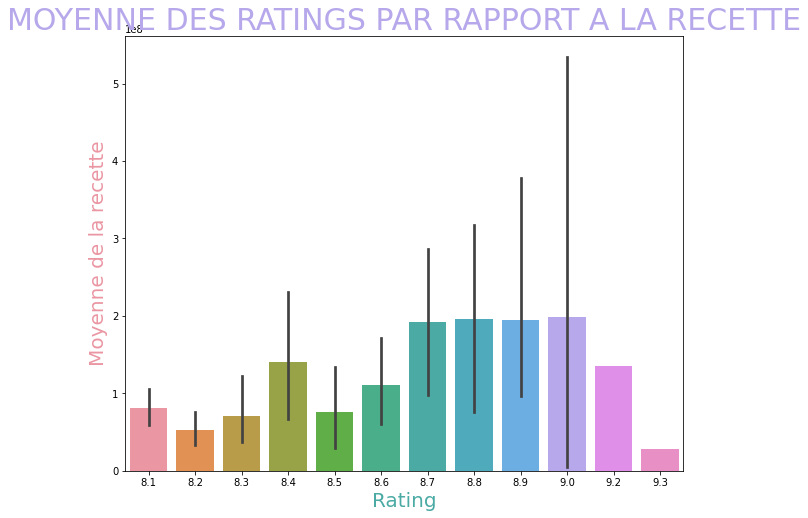

In [10]:
plt.figure(figsize=(10,8));
graph = sns.barplot(data=df , x='Rating', y='Gross');
graph.set_title('MOYENNE DE LA RECETTE PAR RAPPORT AUX RATINGS', size='30',color="#B6A8EB")

plt.ylabel('Moyenne de la recette', size=20, color="#EA96A3");
plt.xlabel('Rating', size=20, color="#4BABA4");
graph;

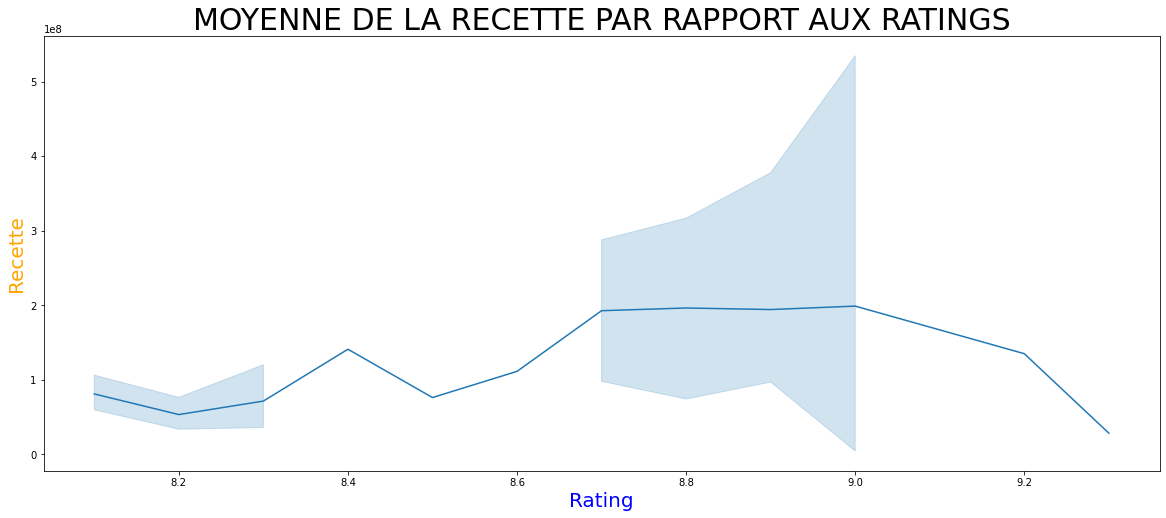

In [18]:
plt.figure(figsize=(20,8));
graph_par_annee = sns.lineplot(y='Gross', x='Rating',data=df);
graph_par_annee.set_title("MOYENNE DE LA RECETTE PAR RAPPORT AUX RATINGS",size=30);
plt.ylabel('Recette', size=20, color="orange");
plt.xlabel('Rating', size=20, color="blue");
graph_par_annee;

In [32]:
total_par_an1 = df.groupby(by=['Year']).sum()
total_par_an

,Title,Votes,Rating
Year,,,
1921,1,115930.0,8.3000
1924,1,43434.0,8.2000
1925,1,102987.0,8.2000
1926,1,82570.0,8.1000
1927,1,162459.0,8.3000
...,...,...,...
2016,5,989088.0,8.2200
2017,3,1512417.0,8.2000
2018,5,1811503.0,8.3200


In [22]:
total_par_an = df.groupby(by=['Year']).agg({'Title':'count',
'Votes':'sum',
'Rating':'mean'})
total_par_an

,Title,Votes,Rating
Year,,,
1921,1,115930.0,8.3000
1924,1,43434.0,8.2000
1925,1,102987.0,8.2000
1926,1,82570.0,8.1000
1927,1,162459.0,8.3000
...,...,...,...
2016,5,989088.0,8.2200
2017,3,1512417.0,8.2000
2018,5,1811503.0,8.3200


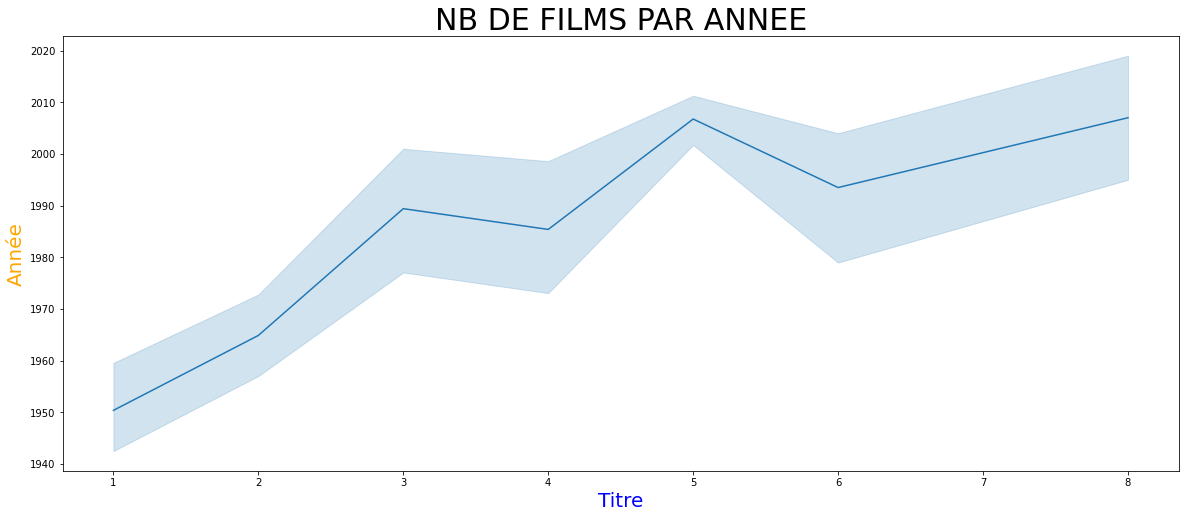

In [40]:
plt.figure(figsize=(20,8));
graph_par_annee = sns.lineplot(y='Year', x='Title',data=total_par_an);
graph_par_annee.set_title("NB DE FILMS PAR ANNEE",size=30);
plt.ylabel('Année', size=20, color="orange");
plt.xlabel('Titre', size=20, color="blue");
graph_par_annee;